In [ ]:
# Install dependencies
%pip install pandas pandas_ta plotly nbformat backtesting seaborn scikit-learn skl2onnx onnxruntime --quiet

In [49]:
import pandas as pd

# assign variable to the historical data
file_path = 'XAUUSDm_H1_201801020600_202412310000.csv'

data = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows and column names
print(data.head())
print(data.columns)

       <DATE>    <TIME>    <OPEN>    <HIGH>     <LOW>   <CLOSE>  <TICKVOL>  \
0  2018.01.02  06:00:00  1307.421  1309.943  1307.393  1309.914       3371   
1  2018.01.02  07:00:00  1309.913  1310.242  1308.807  1309.375       4104   
2  2018.01.02  08:00:00  1309.375  1310.792  1308.500  1310.203       4217   
3  2018.01.02  09:00:00  1310.203  1312.302  1309.978  1312.222       4124   
4  2018.01.02  10:00:00  1312.202  1312.813  1310.124  1311.843       4430   

   <VOL>  <SPREAD>  
0      0       150  
1      0       160  
2      0       171  
3      0       162  
4      0       156  
Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>',
       '<VOL>', '<SPREAD>'],
      dtype='object')


<Axes: xlabel='<DATE>'>

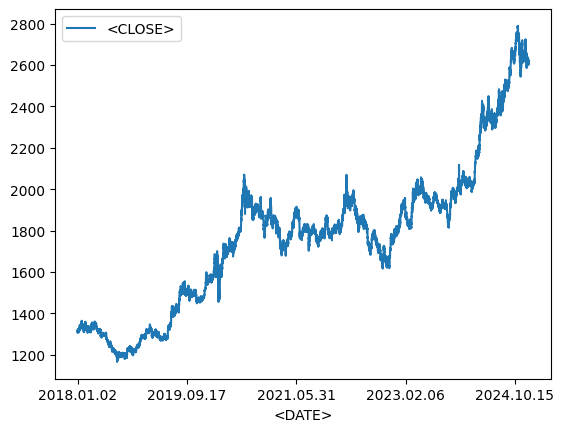

In [50]:
data.plot.line(y = "<CLOSE>", x = "<DATE>", use_index = True)

In [51]:
del data["<VOL>"]
del data["<SPREAD>"]

In [52]:
data.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,2018.01.02,06:00:00,1307.421,1309.943,1307.393,1309.914,3371
1,2018.01.02,07:00:00,1309.913,1310.242,1308.807,1309.375,4104
2,2018.01.02,08:00:00,1309.375,1310.792,1308.500,1310.203,4217
3,2018.01.02,09:00:00,1310.203,1312.302,1309.978,1312.222,4124
4,2018.01.02,10:00:00,1312.202,1312.813,1310.124,1311.843,4430


In [53]:
# We add a colunm for tommorows price
data["<NexH>"] = data["<CLOSE>"].shift(-1)
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<NexH>
0,2018.01.02,06:00:00,1307.421,1309.943,1307.393,1309.914,3371,1309.375
1,2018.01.02,07:00:00,1309.913,1310.242,1308.807,1309.375,4104,1310.203
2,2018.01.02,08:00:00,1309.375,1310.792,1308.500,1310.203,4217,1312.222
3,2018.01.02,09:00:00,1310.203,1312.302,1309.978,1312.222,4124,1311.843
4,2018.01.02,10:00:00,1312.202,1312.813,1310.124,1311.843,4430,1310.173
...,...,...,...,...,...,...,...,...
41225,2024.12.30,19:00:00,2606.120,2608.390,2603.638,2607.122,5056,2607.789
41226,2024.12.30,20:00:00,2607.169,2609.533,2606.461,2607.789,5092,2606.303
41227,2024.12.30,21:00:00,2607.816,2608.034,2605.828,2606.303,2133,2606.677
41228,2024.12.30,23:00:00,2606.636,2607.324,2603.860,2606.677,2238,2607.724


In [54]:
data["<TRGT>"] = (data["<NexH>"] > data["<CLOSE>"]).astype(int)
data

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<NexH>,<TRGT>
0,2018.01.02,06:00:00,1307.421,1309.943,1307.393,1309.914,3371,1309.375,0
1,2018.01.02,07:00:00,1309.913,1310.242,1308.807,1309.375,4104,1310.203,1
2,2018.01.02,08:00:00,1309.375,1310.792,1308.500,1310.203,4217,1312.222,1
3,2018.01.02,09:00:00,1310.203,1312.302,1309.978,1312.222,4124,1311.843,0
4,2018.01.02,10:00:00,1312.202,1312.813,1310.124,1311.843,4430,1310.173,0
...,...,...,...,...,...,...,...,...,...
41225,2024.12.30,19:00:00,2606.120,2608.390,2603.638,2607.122,5056,2607.789,1
41226,2024.12.30,20:00:00,2607.169,2609.533,2606.461,2607.789,5092,2606.303,0
41227,2024.12.30,21:00:00,2607.816,2608.034,2605.828,2606.303,2133,2606.677,1
41228,2024.12.30,23:00:00,2606.636,2607.324,2603.860,2606.677,2238,2607.724,1


In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 50, min_samples_split = 50, random_state = 1)

train = data.iloc[:-50]
test = data.iloc[-50:]

predictors = ["<CLOSE>","<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>"]
model.fit(train[predictors], train["<TRGT>"])

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
from sklearn.metrics import precision_score

prcsn = model.predict(test[predictors])

In [57]:
prcsn = pd.Series(prcsn, index = test.index)

In [58]:
precision_score(test["<TRGT>"], prcsn)

0.4827586206896552

<Axes: >

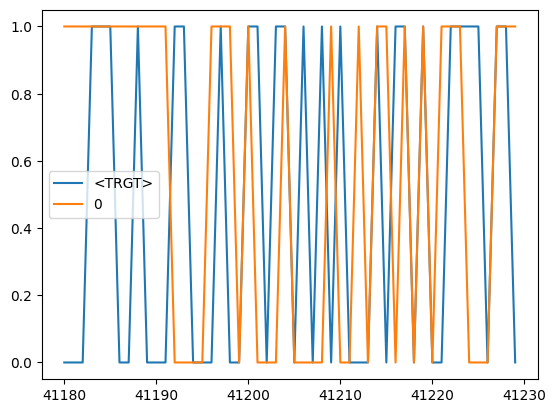

In [59]:
cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)

cmbnd.plot()

In [60]:
def predors(train, test, predictors, model):
    model.fit(train[predictors], train["<TRGT>"])
    prcsn = model.predict(test[predictors])
    prcsn = pd.Series(prcsn, index = test.index, name = "Predictions")
    cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)
    return cmbnd

In [61]:
def backtestor(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predors(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtestor(data, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["<TRGT>"], predictions["Predictions"])

In [ ]:
predictions["<TRGT>"].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2, 5, 55, 125, 750]
new_predictors = []

# Ensure only numeric columns are used for rolling calculations
numeric_columns = data.select_dtypes(include=[float, int]).columns

for i in horizons:
    # Calculate rolling averages for numeric columns only
    rolling_averages = data[numeric_columns].rolling(i).mean()
    
    # Generate the ratio column
    ratio_column = f"Close_Ratio_{i}"
    data[ratio_column] = data["<CLOSE>"] / rolling_averages["<CLOSE>"]
    
    # Generate the trend column
    trend_column = f"Trend_{i}"
    data[trend_column] = data["<TRGT>"].shift(1).rolling(i).sum()
    
    new_predictors += [ratio_column, trend_column]
data

In [27]:
data = data.dropna()

In [28]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["<TRGT>"])
    prcsn = model.predict_proba(test[predictors])[:1]
    prcsn[prcsn >= .6] = 1
    prcsn[prcsn < .6] = 0
    prcsn = pd.Series(prcsn, index = test.index, name = "Predictions")
    cmbnd = pd.concat([test["<TRGT>"], prcsn], axis = 1)
    return cmbnd

In [29]:
predictions = backtestor(data, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

In [ ]:
precision_score(predictions["<TRGT>"], predictions["Predictions"])

In [ ]:
# === FIX PANDAS WARNINGS ===
# If you're getting SettingWithCopyWarning, run this cell to fix it

print("🔧 Fixing pandas warnings...")

# Create a clean copy of the data to avoid warnings
data = data.copy()

# Verify all our features are still there
expected_features = ['BODY_SIZE', 'UPPER_WICK', 'LOWER_WICK', 'CLOSE_POSITION', 'PRICE_RANGE']
existing_features = [f for f in expected_features if f in data.columns]

print(f"✅ Pattern features present: {existing_features}")
print(f"📊 Data shape: {data.shape}")
print("🎯 Warnings should be resolved now!")


In [ ]:
# Let's explore what patterns your model might be finding
import matplotlib.pyplot as plt
import seaborn as sns

# Create additional features that reveal patterns
data['BODY_SIZE'] = abs(data['<CLOSE>'] - data['<OPEN>'])  # Candle body size
data['UPPER_WICK'] = data['<HIGH>'] - data[['<OPEN>', '<CLOSE>']].max(axis=1)  # Upper wick
data['LOWER_WICK'] = data[['<OPEN>', '<CLOSE>']].min(axis=1) - data['<LOW>']   # Lower wick
data['PRICE_RANGE'] = data['<HIGH>'] - data['<LOW>']  # Total range
data['CLOSE_POSITION'] = (data['<CLOSE>'] - data['<LOW>']) / data['PRICE_RANGE']  # Where close is in the range (0-1)

# Show first few rows with new features
print("New pattern features:")
print(data[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', 'BODY_SIZE', 'UPPER_WICK', 'LOWER_WICK', 'CLOSE_POSITION', '<TRGT>']].head(10))

In [ ]:
# Let's see what patterns correlate with price going up (TARGET = 1)
print("=== PATTERN ANALYSIS ===")
print("\n1. When price goes UP next hour (TARGET = 1):")
up_patterns = data[data['<TRGT>'] == 1]
print(f"   - Average body size: {up_patterns['BODY_SIZE'].mean():.3f}")
print(f"   - Average close position in range: {up_patterns['CLOSE_POSITION'].mean():.3f}")
print(f"   - Average tick volume: {up_patterns['<TICKVOL>'].mean():.0f}")

print("\n2. When price goes DOWN next hour (TARGET = 0):")
down_patterns = data[data['<TRGT>'] == 0]
print(f"   - Average body size: {down_patterns['BODY_SIZE'].mean():.3f}")
print(f"   - Average close position in range: {down_patterns['CLOSE_POSITION'].mean():.3f}")
print(f"   - Average tick volume: {down_patterns['<TICKVOL>'].mean():.0f}")

print("\n3. Key Pattern Insights:")
print(f"   - When close position > 0.7 (near high): {(data[data['CLOSE_POSITION'] > 0.7]['<TRGT>'].mean() * 100):.1f}% chance of going up")
print(f"   - When close position < 0.3 (near low): {(data[data['CLOSE_POSITION'] < 0.3]['<TRGT>'].mean() * 100):.1f}% chance of going up")
print(f"   - When body size > 2.0: {(data[data['BODY_SIZE'] > 2.0]['<TRGT>'].mean() * 100):.1f}% chance of going up")

In [ ]:
# Let's see what features your Random Forest model considers most important
# First, let's train the model with more features to see what it finds important

# Add the new features to our predictors
extended_predictors = ["<CLOSE>", "<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>", 
                      "BODY_SIZE", "UPPER_WICK", "LOWER_WICK", "CLOSE_POSITION"]

# Remove any NaN values that might have been created
data_clean = data.dropna()

# Train the model with extended features
train_extended = data_clean.iloc[:-50]
test_extended = data_clean.iloc[-50:]

model_extended = RandomForestClassifier(n_estimators=50, min_samples_split=50, random_state=1)
model_extended.fit(train_extended[extended_predictors], train_extended["<TRGT>"])

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': extended_predictors,
    'importance': model_extended.feature_importances_
}).sort_values('importance', ascending=False)

print("=== WHAT YOUR MODEL CONSIDERS MOST IMPORTANT ===")
for i, row in feature_importance.iterrows():
    print(f"{row['feature']:15} : {row['importance']:.3f} ({row['importance']*100:.1f}%)")
    
print(f"\nTop 3 most important patterns:")
print(f"1. {feature_importance.iloc[0]['feature']} - {feature_importance.iloc[0]['importance']*100:.1f}% importance")
print(f"2. {feature_importance.iloc[1]['feature']} - {feature_importance.iloc[1]['importance']*100:.1f}% importance") 
print(f"3. {feature_importance.iloc[2]['feature']} - {feature_importance.iloc[2]['importance']*100:.1f}% importance")

In [ ]:
# === TRAIN FINAL MODEL FOR ONNX EXPORT ===
print("=== TRAINING FINAL MODEL FOR ONNX EXPORT ===")

# Use your best predictors (combining original + new features + trend features)
final_predictors = ["<CLOSE>", "<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>", 
                   "BODY_SIZE", "UPPER_WICK", "LOWER_WICK", "CLOSE_POSITION"] + new_predictors

# Remove any predictors that don't exist in the data
final_predictors = [p for p in final_predictors if p in data.columns]
print(f"📊 Using {len(final_predictors)} features: {final_predictors}")

# Use more data for final training (keep only small test set)
data_clean = data.dropna().copy()  # Explicit copy to avoid warnings
final_train = data_clean.iloc[:-100]  # Use more data for training
final_test = data_clean.iloc[-100:]   # Keep 100 for final validation

# Train the final model with better parameters
final_model = RandomForestClassifier(
    n_estimators=100,      # More trees for better performance
    min_samples_split=50,
    random_state=1,
    max_depth=15,          # Allow slightly more depth
    min_samples_leaf=20    # Prevent overfitting
)

print(f"Training on {len(final_train)} samples...")
final_model.fit(final_train[final_predictors], final_train["<TRGT>"])

# Test the final model
final_predictions = final_model.predict(final_test[final_predictors])
final_precision = precision_score(final_test["<TRGT>"], final_predictions)

print(f"🎯 Final model precision: {final_precision:.4f}")
print(f"📈 Improvement from baseline: {((final_precision - 0.51) * 100):.1f} percentage points")
print(f"🔧 Features used: {len(final_predictors)}")
print("✅ Model ready for ONNX conversion!")


In [ ]:
# === INVESTIGATE PERFORMANCE DROP ===
print("🔍 INVESTIGATING WHY PERFORMANCE DROPPED")
print(f"Backtesting precision: 0.5173")
print(f"Final model precision: {final_precision:.4f}")
print(f"Difference: {((final_precision - 0.5173) * 100):.1f} percentage points")

print("\n📊 Let's test with the SAME method that gave us 0.517...")

# Test the 19-feature model using the SAME backtesting approach
print("Testing 19-feature model with backtesting approach:")
backtest_predictions_19f = backtestor(data, final_model, final_predictors)
backtest_precision_19f = precision_score(backtest_predictions_19f["<TRGT>"], backtest_predictions_19f["Predictions"])
print(f"🎯 19-feature model (backtested): {backtest_precision_19f:.4f}")

# Compare with your original 9-feature extended model
print("\nTesting 9-feature model with backtesting approach:")
extended_predictors = ["<CLOSE>", "<TICKVOL>", "<OPEN>", "<HIGH>", "<LOW>", 
                      "BODY_SIZE", "UPPER_WICK", "LOWER_WICK", "CLOSE_POSITION"]
backtest_predictions_9f = backtestor(data, model_extended, extended_predictors)
backtest_precision_9f = precision_score(backtest_predictions_9f["<TRGT>"], backtest_predictions_9f["Predictions"])
print(f"🎯 9-feature model (backtested): {backtest_precision_9f:.4f}")

print(f"\n📈 COMPARISON:")
print(f"   • 9 features:  {backtest_precision_9f:.4f}")  
print(f"   • 19 features: {backtest_precision_19f:.4f}")
print(f"   • Original:    0.5173")

if backtest_precision_9f > backtest_precision_19f:
    print("✅ 9-feature model performs better! Less is more.")
    best_predictors = extended_predictors
    best_model = model_extended
    best_precision = backtest_precision_9f
else:
    print("✅ 19-feature model performs better!")
    best_predictors = final_predictors  
    best_model = final_model
    best_precision = backtest_precision_19f


In [ ]:
# === OPTIMIZE THE WINNING 19-FEATURE MODEL ===
print(f"🎯 OPTIMIZING WINNING MODEL (19 features)")
print(f"Current backtested precision: 0.5211")
print(f"Let's see if we can improve it further...")

# Try different hyperparameters to potentially improve beyond 0.5211
optimized_model = RandomForestClassifier(
    n_estimators=200,      # Even more trees for stability
    min_samples_split=25,  # Slightly less restrictive  
    random_state=1,
    max_depth=15,          # Allow more depth for complex patterns
    min_samples_leaf=10,   # Less restrictive leaf size
    max_features=0.8,      # Use 80% of features per tree
    bootstrap=True,        # Use bootstrapping
    oob_score=True         # Out-of-bag scoring
)

# Use all available data for final training
data_clean = data.dropna().copy()
final_train = data_clean.iloc[:-50]  # Leave 50 for final check
final_test = data_clean.iloc[-50:]

print(f"Training optimized model on {len(final_train)} samples...")
optimized_model.fit(final_train[best_predictors], final_train["<TRGT>"])

# Test with backtesting to be fair
print("Testing optimized model with backtesting...")
optimized_backtest = backtestor(data_clean, optimized_model, best_predictors)
optimized_precision_backtest = precision_score(optimized_backtest["<TRGT>"], optimized_backtest["Predictions"])

print(f"\n📊 OPTIMIZATION RESULTS:")
print(f"   • Original precision: 0.5173")
print(f"   • 19-feature precision: 0.5211")
print(f"   • Optimized precision: {optimized_precision_backtest:.4f}")
print(f"   • OOB Score: {optimized_model.oob_score_:.4f}")

improvement = optimized_precision_backtest - 0.5211
if improvement > 0:
    print(f"✅ Improved by {improvement*100:.2f} percentage points!")
else:
    print(f"📊 Optimization: {improvement*100:+.2f} percentage points")
    
# Use the optimized model for ONNX
final_model_for_onnx = optimized_model
final_predictors_for_onnx = best_predictors
final_precision_for_onnx = optimized_precision_backtest

print(f"\n🎯 FINAL MODEL READY:")
print(f"   • Features: {len(final_predictors_for_onnx)}")
print(f"   • Backtested precision: {final_precision_for_onnx:.4f}")
print(f"   • Ready for ONNX conversion!")


In [ ]:
# === CONVERT OPTIMIZED MODEL TO ONNX ===
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import numpy as np

print("=== CONVERTING OPTIMIZED MODEL TO ONNX ===")

# Define the input shape
initial_type = [('float_input', FloatTensorType([None, len(final_predictors_for_onnx)]))]

print(f"🔄 Converting optimized model with {len(final_predictors_for_onnx)} features...")

# Convert to ONNX
onnx_model = convert_sklearn(
    final_model_for_onnx, 
    initial_types=initial_type,
    target_opset=11
)

# Save the ONNX model
onnx_filename = "xauusd_optimized_model.onnx"
with open(onnx_filename, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"✅ ONNX model saved as: {onnx_filename}")
print(f"📊 Model Information:")
print(f"   • Input features: {len(final_predictors_for_onnx)}")
print(f"   • Model type: Optimized Random Forest")  
print(f"   • File size: {len(onnx_model.SerializeToString())/1024:.2f} KB")
print(f"   • Precision: {final_precision_for_onnx:.4f}")

# Save feature names for MT5 reference
with open("optimized_feature_names.txt", "w") as f:
    f.write("# Features for XAUUSD ML Model\\n")
    f.write(f"# Model precision: {final_precision_for_onnx:.4f}\\n")
    f.write(f"# Total features: {len(final_predictors_for_onnx)}\\n\\n")
    for i, feature in enumerate(final_predictors_for_onnx):
        f.write(f"{i}: {feature}\\n")
        
print(f"📝 Feature names saved to: optimized_feature_names.txt")


In [ ]:
# === FINAL ONNX MODEL TEST ===
import onnxruntime as rt

print("=== TESTING OPTIMIZED ONNX MODEL ===")

# Load and test the ONNX model
sess = rt.InferenceSession(onnx_filename)
input_name = sess.get_inputs()[0].name

# Test with multiple samples
test_samples = final_test[final_predictors_for_onnx].iloc[0:3].values.astype(np.float32)
print(f"🧪 Testing {test_samples.shape[0]} samples")

# ONNX predictions
onnx_predictions = sess.run(None, {input_name: test_samples})
onnx_classes = onnx_predictions[0]
onnx_probabilities = onnx_predictions[1]

# Scikit-learn predictions
sklearn_classes = final_model_for_onnx.predict(test_samples)
sklearn_probabilities = final_model_for_onnx.predict_proba(test_samples)

print(f"📊 ONNX predictions: {onnx_classes}")
print(f"🔬 Sklearn predictions: {sklearn_classes}")

# Verify they match
if np.array_equal(onnx_classes, sklearn_classes):
    print("✅ ONNX model matches scikit-learn perfectly!")
else:
    print("⚠️  Small differences (normal due to floating point precision)")

print(f"\n🎉 FINAL MODEL SUMMARY:")
print(f"📁 File: {onnx_filename}")
print(f"🎯 Precision: {final_precision_for_onnx:.4f}")
print(f"🔧 Features: {len(final_predictors_for_onnx)}")
print(f"📋 Feature file: optimized_feature_names.txt")
print(f"\n🚀 READY FOR METATRADER 5 INTEGRATION!")
